In [1]:
import networkx as nx
import geopandas as gpd
import ipywidgets as widgets

In [2]:
from preprocessing import Preprocessing as pp

# Network Construction

## Mutli Directed Network

In [3]:
G = pp.create_network_from_trailway('../../../data/Railway Data_JL.xlsx')

Network creation: 


100%|██████████| 69638/69638 [00:11<00:00, 5990.69it/s]


In [4]:
G.number_of_nodes()

2719

In [5]:
G.number_of_edges()

64155

In [6]:
count = 0
for u in G.edges(data=True):
    if u[2]["distance"] < 0:
        count += 1

print(count)

32


## Simplified Single Directed network

In [7]:
SG = G

for edge in list(SG.edges):
    if edge[2] != 0:
        SG.remove_edge(edge[0], edge[1], key=edge[2])

In [8]:
SG.number_of_nodes()

2719

In [9]:
SG.number_of_edges()

10789

NetworkXError: Node 692 has no position.

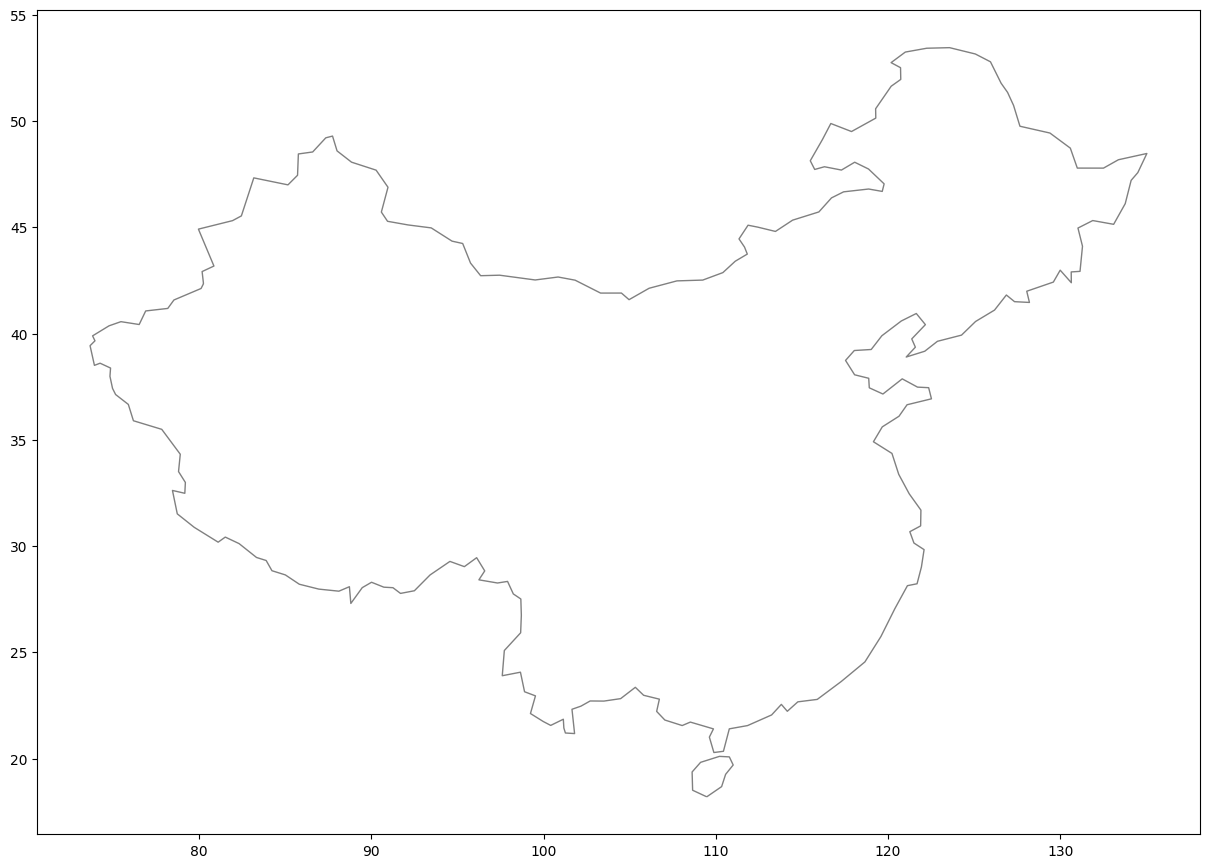

In [10]:
pos = nx.get_node_attributes(SG, 'pos')
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
china = world[world["name"] == "China"]
china.plot(linewidth=1, edgecolor="grey", facecolor="white", figsize=(15,15))
nx.draw(SG,pos,node_size=7, width=1 )

## Undirected network only spatial

In [ ]:
SG = SG.to_undirected(reciprocal=False)

In [ ]:
SG.number_of_nodes()

In [ ]:
SG.number_of_edges()

In [ ]:
for edge,data in list(SG.nodes(data=True)):
    print(edge, data)

In [ ]:
pos = nx.get_node_attributes(SG, 'pos')

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
china = world[world["name"] == "China"]
china.plot(linewidth=1, edgecolor="grey", facecolor="white", figsize=(15,15))
nx.draw(SG,pos,node_size=7, width=1 )

## Animated graph

In [ ]:
# Import slider package
from matplotlib.widgets import Slider

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
china = world[world["name"] == "China"]
china.plot(linewidth=1, edgecolor="grey", facecolor="white", figsize=(15,15))
nx.draw_networkx_nodes(SG,pos,node_size=5)
nx.draw_networkx_edges(SG,pos, width=1, edge_color="grey")
G2 = nx.DiGraph(((source, target, attr) for source, target, attr in G.edges(data=True) if attr['dep_time'] < 600 and attr['arr_time'] > 600))
nx.draw_networkx_edges(G2,pos, width=3, edge_color="red")

In [ ]:
G2 = nx.DiGraph(((source, target, attr) for source, target, attr in G.edges(data=True) if attr['dep_time'] < 600 and attr['arr_time'] > 600))

In [ ]:
G2.number_of_nodes()

In [ ]:
G2.number_of_edges()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()

min_slider = min(list(nx.get_edge_attributes(G, 'dep_time').values()))
max_slider = max(list(nx.get_edge_attributes(G, 'arr_time').values()))

int_range = widgets.IntSlider(min=min_slider, max=max_slider, step=10, value=((max_slider-min_slider)/2))
output2 = widgets.Output()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
china = world[world["name"] == "China"]

display(int_range, output2)

def on_value_change(change):
    with output2:
        ax.clear()
        G2 = nx.DiGraph(((source, target, attr) for source, target, attr in G.edges(data=True) if attr['dep_time'] < change['new'] and attr['arr_time'] > change['new']))
        china.plot(linewidth=1, edgecolor="grey", facecolor="white", figsize=(20,20),ax=ax, legend=True)
        nx.draw_networkx_nodes(SG,pos,node_size=1, ax=ax)
        nx.draw_networkx_edges(G2,pos, width=1, edge_color="red",ax=ax)
        plt.show()

int_range.observe(on_value_change, names='value')